In [213]:
# Comparison of Entropy computations:
# * True entropy
# * Numerically computed entropy
# * Approximated entropies
#    * Polynomial approximation (Sec 5.6.1 of ICA book)
#    * Nonpolynomial approximation (Sec 5.6.2)

1.0002010557472434


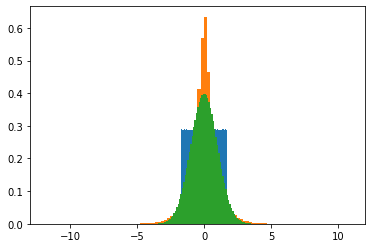

In [215]:
import matplotlib.pyplot as plt
import numpy as np
K = 10000000
u = np.random.rand(K)
u -= np.mean(u)
u /= np.std(u)

g = np.random.randn(K)

b = 1./np.sqrt(2)
l = np.random.laplace(scale=b, size=(K,))
print(l.std())
#l -= l.mean()
#l /= l.std()

(pu, ubins, _) = plt.hist(u, 100, density=True)
(pl, lbins, _) = plt.hist(l, 100, density=True)
(pg, gbins, _) = plt.hist(g, 100, density=True)

In [216]:
def entropy_numeric(p, bins):

    H = 0
    for i in range(len(bins)-1):
        x0 = bins[i]
        x1 = bins[i+1]
        dx = x1-x0
        if p[i] == 0:
            continue
        H -= (np.log2(p[i])*p[i]*dx)
    
    return H

In [217]:
## 0 True entropies

# True entropy for uniform
print(np.log2(np.max(u)-np.min(u)))

# True entropy for laplace: 
print(np.log2(2*b*np.e))

Hgauss = 1./2*np.log2(2*np.e*np.pi) 
print(Hgauss)

1.7925526892889134
1.9426950408889632
2.047095585180641


In [218]:
#1: Numeric entropies
Hu = entropy_numeric(pu, ubins)
Hl = entropy_numeric(pl, lbins)
Hg = entropy_numeric(pg, gbins)
print(Hu)
print(Hl)
print(Hg)

1.7925442077995766
1.9490666737090407
2.0476503288827765


In [219]:
from scipy.stats import kurtosis

print(Hgauss)

2.047095585180641


In [220]:
def entropy_poly_approx(x):
    E3 = np.mean(x**3)
    E3_2 = E3**2
    kurt = kurtosis(x)
    
    # J is NEGentropy
    J = (1./12.)*E3_2 + (1./48.)*kurt**2
    
    Happrox = Hgauss-J
    
    # Top obtain ENTROPY, we need to use the ENTROPY of gaussian (see eq 5.24)
    return Happrox

In [221]:
#2: Approx by polynomial
print(entropy_poly_approx(u))
print(entropy_poly_approx(l))
print(entropy_poly_approx(g))

2.0171193469132236
1.8600489081239104
2.047095552108735


In [222]:
G1 = lambda x : x*np.exp(-(x**2)/2.)
G2a = lambda x : np.abs(x)
G2b = lambda x : np.exp(-(x**2.)/2.)

k1 = 36./(8*np.sqrt(3)-9)
k2a = 1./(2.-6./np.pi)
k2b = 24./(16*np.sqrt(3)-27)

def entropy_nonpoly_approx_a(x):
    t1 = k1*np.mean(G1(x))**2
    t2a = k2a*(np.mean(G2a(x))-np.sqrt(2./np.pi))**2
    J = t1+t2a
    return Hgauss-J

def entropy_nonpoly_approx_b(x):
    t1 = k1*np.mean(G1(x))**2
    t2b = k2b*(np.mean(G2b(x))-np.sqrt(1./2))**2
    J = t1+t2b
    return Hgauss-J

In [223]:
#2: Approx by polynomial
print(entropy_nonpoly_approx_a(u))
print(entropy_nonpoly_approx_a(l))
print(entropy_nonpoly_approx_a(g))

1.9956792497913733
1.9561225028134266
2.047095501460019


In [224]:
#2: Approx by polynomial
print(entropy_nonpoly_approx_b(u))
print(entropy_nonpoly_approx_b(l))
print(entropy_nonpoly_approx_b(g))

1.9827257407257541
1.9607938408393488
2.0470954930925074
